# Imports

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

# Data Preprocessing

In [2]:
data_URL = "./Cleaned Data/Data.csv"

data = pd.read_csv(data_URL, index_col=0)

print(data.shape)

data.head()

(205, 53)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_eight,cylindernumber_twelve,fuelsystem_mpfi,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_1bbl,fuelsystem_spdi,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,0,0,0,0,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,1,0,0,0,0,0,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,1,0,0,0,0,0,0,0


#### Histogram of Price

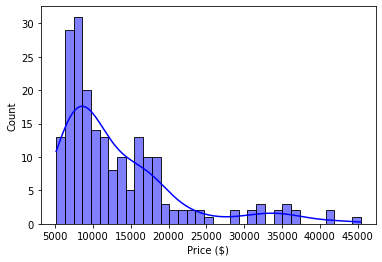

In [36]:
sns.histplot(data=data, x='price', bins=35, color='blue', kde=True)
plt.xlabel('Price ($)')
plt.show()

#### Histogram of Price, Log Scale

<ipython-input-40-987c3764e8aa>:1: RuntimeWarning: divide by zero encountered in log
  sns.histplot(data=np.log(data), x='price', bins=35, color='blue', kde=True)
<ipython-input-40-987c3764e8aa>:1: RuntimeWarning: invalid value encountered in log
  sns.histplot(data=np.log(data), x='price', bins=35, color='blue', kde=True)


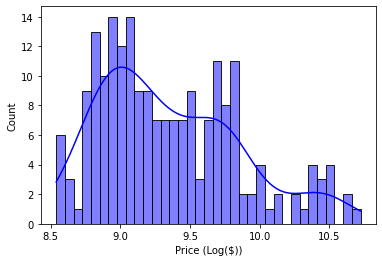

In [40]:
sns.histplot(data=np.log(data), x='price', bins=35, color='blue', kde=True)
plt.xlabel('Price (Log($))')
plt.show()

## Data Scaling (Numerical)
### Standard

In [5]:
scaler = StandardScaler()

In [6]:
numerical_columns = data.columns.tolist()
numerical_columns = list(filter(lambda x: '_' not in x, numerical_columns))
scaling_columns = list(filter(lambda x: x != "price", numerical_columns))
# []"symboling", "carheight", "compressionratio", "peakrpm", "stroke"]
data[scaling_columns].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [7]:
standard_data = data.copy()
standard_data[scaling_columns] = scaler.fit_transform(data[scaling_columns])
standard_data[scaling_columns].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
3,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
4,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
5,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


### MinMax

In [8]:
scaler = MinMaxScaler()

In [9]:
numerical_columns = data.columns.tolist()
numerical_columns = list(filter(lambda x: '_' not in x, numerical_columns))
scaling_columns = list(filter(lambda x: x != "price", numerical_columns))
# ["symboling", "carheight", "compressionratio", "peakrpm", "stroke"]
data[scaling_columns].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [10]:
minmax_data = data.copy()
minmax_data[scaling_columns] = scaler.fit_transform(data[scaling_columns])
minmax_data[scaling_columns].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
2,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
3,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158
4,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421
5,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895


# Data Splitting

In [11]:
standard_X = standard_data.drop(columns="price")
standard_Y = standard_data["price"]

minmax_X = minmax_data.drop(columns="price")
minmax_Y = minmax_data["price"]

print(standard_X.shape)
print(standard_Y.shape)

(205, 52)
(205,)


In [12]:
standard_train_X, standard_test_X, standard_train_Y, standard_test_Y = train_test_split(standard_X, standard_Y, train_size=0.8, test_size=0.2, shuffle=True)
minmax_train_X, minmax_test_X, minmax_train_Y, minmax_test_Y = train_test_split(minmax_X, minmax_Y, train_size=0.8, test_size=0.2, shuffle=True)

In [13]:
print(standard_train_X.shape, standard_train_Y.shape)
print(standard_test_X.shape, standard_test_Y.shape)

(164, 52) (164,)
(41, 52) (41,)


# Models
## Model 1 (Naive Standard Scale)

In [14]:
model1 = LinearRegression()
model1.fit(standard_train_X, standard_train_Y)

model1_pred_train = model1.predict(standard_train_X)
model1_pred_test = model1.predict(standard_test_X)

model1_train_mse = mean_squared_error(standard_train_Y, model1_pred_train, squared=False)
model1_test_mse = mean_squared_error(standard_test_Y, model1_pred_test, squared=False)

model1_train_r2 = r2_score(standard_train_Y, model1_pred_train) * 100
model1_test_r2 = r2_score(standard_test_Y, model1_pred_test) * 100

print("Train MSE:", model1_train_mse)
print("Test MSE:", model1_test_mse)

print("Train r2:", model1_train_r2)
print("Test r2:", model1_test_r2)

Train MSE: 2007.0440382935328
Test MSE: 2254.6918279711003
Train r2: 93.6004506575066
Test r2: 92.24108772622114


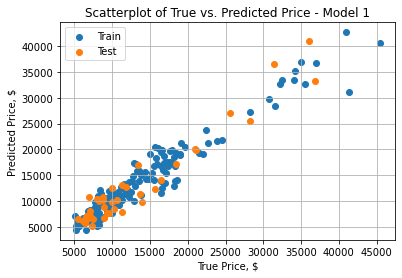

In [56]:
# Scatterplot of actual vs. predicted price
m1train = plt.scatter(standard_train_Y, model1_pred_train, label='Train')
m1test = plt.scatter(standard_test_Y, model1_pred_test, label='Test')
plt.xlabel('True Price, $')
plt.ylabel('Predicted Price, $')
plt.title('Scatterplot of True vs. Predicted Price - Model 1')
plt.grid()
plt.legend();

## Model 2 (Remove Unnecessary Features Standard Scale)

In [15]:
useful_standard_train_X = standard_train_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])
useful_standard_test_X = standard_test_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])

In [16]:
model2 = LinearRegression()
model2.fit(useful_standard_train_X, standard_train_Y)

model2_pred_train = model2.predict(useful_standard_train_X)
model2_pred_test = model2.predict(useful_standard_test_X)

model2_train_mse = mean_squared_error(standard_train_Y, model2_pred_train, squared=False)
model2_test_mse = mean_squared_error(standard_test_Y, model2_pred_test, squared=False)

model2_train_r2 = r2_score(standard_train_Y, model2_pred_train) * 100
model2_test_r2 = r2_score(standard_test_Y, model2_pred_test) * 100

print("Train MSE:", model2_train_mse)
print("Test MSE:", model2_test_mse)

print("Train r2:", model2_train_r2)
print("Test r2:", model2_test_r2)

Train MSE: 2217.910072521049
Test MSE: 2801.055734029391
Train r2: 92.18509946598178
Test r2: 88.02515334832005


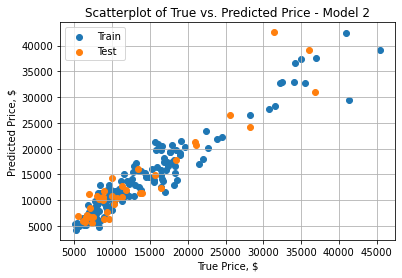

In [57]:
# Scatterplot of actual vs. predicted price
m2train = plt.scatter(standard_train_Y, model2_pred_train, label='Train')
m2test = plt.scatter(standard_test_Y, model2_pred_test, label='Test')
plt.xlabel('True Price, $')
plt.ylabel('Predicted Price, $')
plt.title('Scatterplot of True vs. Predicted Price - Model 2')
plt.grid()
plt.legend();

## Model 3 (Log transform Y Standard Scale)

In [17]:
model3 = LinearRegression()
model3.fit(standard_train_X, np.log(standard_train_Y))

model3_pred_train = model3.predict(standard_train_X)
model3_pred_test = model3.predict(standard_test_X)

model3_train_mse = mean_squared_error(np.log(standard_train_Y), model3_pred_train, squared=False)
model3_test_mse = mean_squared_error(np.log(standard_test_Y), model3_pred_test, squared=False)

model3_train_r2 = r2_score(np.log(standard_train_Y), model3_pred_train) * 100
model3_test_r2 = r2_score(np.log(standard_test_Y), model3_pred_test) * 100

print("Train MSE:", model3_train_mse)
print("Test MSE:", model3_test_mse)

print("Train r2:", model3_train_r2)
print("Test r2:", model3_test_r2)

Train MSE: 0.11817279581727122
Test MSE: 0.17207811460922595
Train r2: 94.40893534033168
Test r2: 88.67234587282873


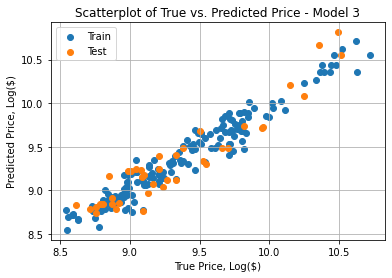

In [58]:
# Scatterplot of actual vs. predicted price
m3train = plt.scatter(np.log(standard_train_Y), model3_pred_train, label='Train')
m3test = plt.scatter(np.log(standard_test_Y), model3_pred_test, label='Test')
plt.xlabel('True Price, Log($)')
plt.ylabel('Predicted Price, Log($)')
plt.title('Scatterplot of True vs. Predicted Price - Model 3')
plt.grid()
plt.legend();

## Model 4 (All of the Above)

In [18]:
useful_standard_train_X = standard_train_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])
useful_standard_test_X = standard_test_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])

In [19]:
model4 = LinearRegression()
model4.fit(useful_standard_train_X, np.log(standard_train_Y))

model4_pred_train = model4.predict(useful_standard_train_X)
model4_pred_test = model4.predict(useful_standard_test_X)

model4_train_mse = mean_squared_error(np.log(standard_train_Y), model4_pred_train, squared=False)
model4_test_mse = mean_squared_error(np.log(standard_test_Y), model4_pred_test, squared=False)

model4_train_r2 = r2_score(np.log(standard_train_Y), model4_pred_train) * 100
model4_test_r2 = r2_score(np.log(standard_test_Y), model4_pred_test) * 100

print("Train MSE:", model4_train_mse)
print("Test MSE:", model4_test_mse)

print("Train r2:", model4_train_r2)
print("Test r2:", model4_test_r2)

Train MSE: 0.1248011024512061
Test MSE: 0.18284828568378825
Train r2: 93.7641402727949
Test r2: 87.21000166871298


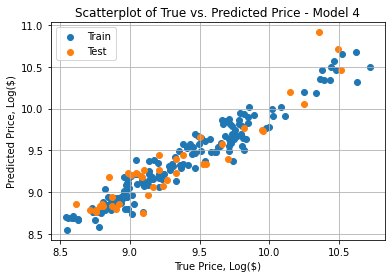

In [59]:
# Scatterplot of actual vs. predicted price
m4train = plt.scatter(np.log(standard_train_Y), model4_pred_train, label='Train')
m4test = plt.scatter(np.log(standard_test_Y), model4_pred_test, label='Test')
plt.xlabel('True Price, Log($)')
plt.ylabel('Predicted Price, Log($)')
plt.title('Scatterplot of True vs. Predicted Price - Model 4')
plt.grid()
plt.legend();

## Model 5 (Naive MinMax Scale)

In [20]:
model5 = LinearRegression()
model5.fit(minmax_train_X, minmax_train_Y)

model5_pred_train = model5.predict(minmax_train_X)
model5_pred_test = model5.predict(minmax_test_X)

model5_train_mse = mean_squared_error(minmax_train_Y, model5_pred_train, squared=False)
model5_test_mse = mean_squared_error(minmax_test_Y, model5_pred_test, squared=False)

model5_train_r2 = r2_score(minmax_train_Y, model5_pred_train) * 100
model5_test_r2 = r2_score(minmax_test_Y, model5_pred_test) * 100

print("Train MSE:", model2_train_mse)
print("Test MSE:", model2_test_mse)

print("Train r2:", model2_train_r2)
print("Test r2:", model2_test_r2)

Train MSE: 2217.910072521049
Test MSE: 2801.055734029391
Train r2: 92.18509946598178
Test r2: 88.02515334832005


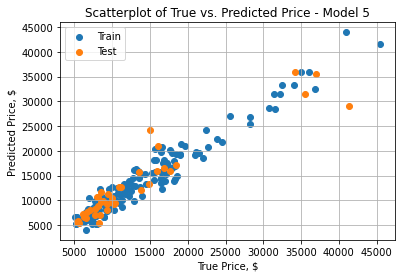

In [60]:
# Scatterplot of actual vs. predicted price
m5train = plt.scatter(minmax_train_Y, model5_pred_train, label='Train')
m5test = plt.scatter(minmax_test_Y, model5_pred_test, label='Test')
plt.xlabel('True Price, $')
plt.ylabel('Predicted Price, $')
plt.title('Scatterplot of True vs. Predicted Price - Model 5')
plt.grid()
plt.legend();

## Model 6 (Remove Unnecessary Feature MinMax Scale)

In [21]:
useful_minmax_train_X = minmax_train_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])
useful_minmax_test_X = minmax_test_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])

In [22]:
model6 = LinearRegression()
model6.fit(useful_minmax_train_X, minmax_train_Y)

model6_pred_train = model6.predict(useful_minmax_train_X)
model6_pred_test = model6.predict(useful_minmax_test_X)

model6_train_mse = mean_squared_error(minmax_train_Y, model6_pred_train, squared=False)
model6_test_mse = mean_squared_error(minmax_test_Y, model6_pred_test, squared=False)

model6_train_r2 = r2_score(minmax_train_Y, model6_pred_train) * 100
model6_test_r2 = r2_score(minmax_test_Y, model6_pred_test) * 100

print("Train MSE:", model6_train_mse)
print("Test MSE:", model6_test_mse)

print("Train r2:", model6_train_r2)
print("Test r2:", model6_test_r2)

Train MSE: 2039.6626529828818
Test MSE: 2904.1103520004854
Train r2: 93.0955255192087
Test r2: 88.92862210633696


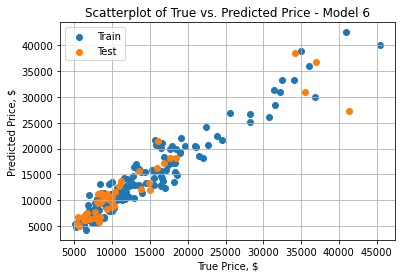

In [61]:
# Scatterplot of actual vs. predicted price
m6train = plt.scatter(minmax_train_Y, model6_pred_train, label='Train')
m6test = plt.scatter(minmax_test_Y, model6_pred_test, label='Test')
plt.xlabel('True Price, $')
plt.ylabel('Predicted Price, $')
plt.title('Scatterplot of True vs. Predicted Price - Model 6')
plt.grid()
plt.legend();

## Model 7 (Log Transform Y MinMax Scale)

In [23]:
model7 = LinearRegression()
model7.fit(minmax_train_X, np.log(minmax_train_Y))

model7_pred_train = model7.predict(minmax_train_X)
model7_pred_test = model7.predict(minmax_test_X)

model7_train_mse = mean_squared_error(np.log(minmax_train_Y), model7_pred_train, squared=False)
model7_test_mse = mean_squared_error(np.log(minmax_test_Y), model7_pred_test, squared=False)

model7_train_r2 = r2_score(np.log(minmax_train_Y), model7_pred_train) * 100
model7_test_r2 = r2_score(np.log(minmax_test_Y), model7_pred_test) * 100

print("Train MSE:", model7_train_mse)
print("Test MSE:", model7_test_mse)

print("Train r2:", model7_train_r2)
print("Test r2:", model7_test_r2)

Train MSE: 0.12407294484827289
Test MSE: 0.134240230262729
Train r2: 93.79372897263355
Test r2: 93.23165672307267


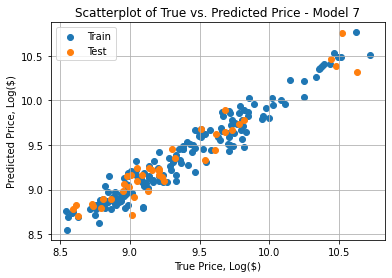

In [62]:
# Scatterplot of actual vs. predicted price
m7train = plt.scatter(np.log(minmax_train_Y), model7_pred_train, label='Train')
m7test = plt.scatter(np.log(minmax_test_Y), model7_pred_test, label='Test')
plt.xlabel('True Price, Log($)')
plt.ylabel('Predicted Price, Log($)')
plt.title('Scatterplot of True vs. Predicted Price - Model 7')
plt.grid()
plt.legend();

## Model 8 (All of the Above MinMax Scale)

In [24]:
useful_minmax_train_X = minmax_train_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])
useful_minmax_test_X = minmax_test_X.drop(columns=["symboling", "carheight", "compressionratio", "peakrpm", "stroke"])

In [25]:
model8 = LinearRegression()
model8.fit(useful_minmax_train_X, np.log(minmax_train_Y))

model8_pred_train = model8.predict(useful_minmax_train_X)
model8_pred_test = model8.predict(useful_minmax_test_X)

model8_train_mse = mean_squared_error(np.log(minmax_train_Y), model8_pred_train, squared=False)
model8_test_mse = mean_squared_error(np.log(minmax_test_Y), model8_pred_test, squared=False)

model8_train_r2 = r2_score(np.log(minmax_train_Y), model8_pred_train) * 100
model8_test_r2 = r2_score(np.log(minmax_test_Y), model8_pred_test) * 100

print("Train MSE:", model8_train_mse)
print("Test MSE:", model8_test_mse)

print("Train r2:", model8_train_r2)
print("Test r2:", model8_test_r2)

Train MSE: 0.12837420044539538
Test MSE: 0.15503377572184388
Train r2: 93.35596272731709
Test r2: 90.97245528204122


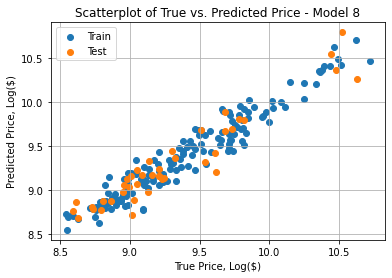

In [63]:
# Scatterplot of actual vs. predicted price
m8train = plt.scatter(np.log(minmax_train_Y), model8_pred_train, label='Train')
m8test = plt.scatter(np.log(minmax_test_Y), model8_pred_test, label='Test')
plt.xlabel('True Price, Log($)')
plt.ylabel('Predicted Price, Log($)')
plt.title('Scatterplot of True vs. Predicted Price - Model 8')
plt.grid()
plt.legend();

In [26]:
# Get regression coefficients
coeffs8 = model8.coef_
print(f'Model 8 Coefficients: {coeffs8}')

# Identify features with largest magnitude of coefficient
# Larger magnitudes indicate coefficients with more significance to determining price
coeffs8_mag = abs(coeffs8)
coeffs8_mag_temp = coeffs8_mag
max_coeffs8_mag_ind = []
num_imp_coeffs = 47
for i in range(num_imp_coeffs):
    maxcoeff8 = np.argmax(coeffs8_mag_temp)
    max_coeffs8_mag_ind.append(maxcoeff8)
    coeffs8_mag_temp[maxcoeff8] = -2    # Changed from 0 to -2 to prevent descrepancies if coefficient magnitude is 0

print(f'Indices of features in descending order of {max_coeffs8_mag_ind}')

Model 8 Coefficients: [ 0.17445797 -0.08442876  0.42738072  0.58954194 -0.19238553  0.30431707
  0.51221748 -0.92385303  0.70588914 -0.05918317  0.04423241  0.01495076
  0.02371327 -0.05594795 -0.03645469 -0.1532722   0.22196157 -0.03881337
  0.03881337 -0.0394898   0.0394898   0.00150224 -0.00150224 -0.32553624
  0.32553624  0.24659562  0.08053441 -0.00383917  0.16257897  0.0852004
  0.00856483 -0.57963505  0.00856483 -0.03687745 -0.36226666 -0.1464302
 -0.0384138   0.41595919  0.15946408  0.06524877 -0.04836517  0.03881337
  0.0665014  -0.08746988 -0.0244261  -0.02218364  0.01188125]
Indices of features in descending order of [7, 8, 3, 31, 6, 2, 37, 34, 23, 24, 5, 25, 16, 4, 0, 28, 38, 15, 35, 43, 29, 1, 26, 42, 39, 9, 13, 40, 10, 19, 20, 18, 41, 17, 36, 33, 14, 44, 12, 45, 11, 46, 32, 30, 27, 21, 22]


### Scatterplot of Price vs. Largest-Weighted Feature

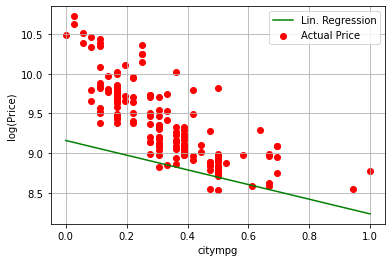

In [27]:
feat_ind = 0;
y1 = plt.scatter(useful_minmax_train_X.iloc[:,max_coeffs8_mag_ind[feat_ind]], np.log(minmax_train_Y), color = "red", label="Actual Price")
# Line plot using individual coefficient
y2 = plt.plot(np.linspace(0,1,5), coeffs8[max_coeffs8_mag_ind[feat_ind]]*np.linspace(0,1,5) + model8.intercept_, color = "green", label="Lin. Regression")
plt.xlabel(useful_minmax_train_X.columns[max_coeffs8_mag_ind[feat_ind]]);
plt.ylabel('log(Price)');
plt.grid()
plt.legend();

### Scatterplot of Price vs. 2nd-Largest-Weighted Feature

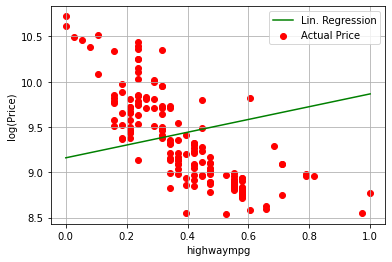

In [28]:
feat_ind = 1;
y1 = plt.scatter(useful_minmax_train_X.iloc[:,max_coeffs8_mag_ind[feat_ind]], np.log(minmax_train_Y), color = "red", label="Actual Price")
# Line plot using individual coefficient
y2 = plt.plot(np.linspace(0,1,5), coeffs8[max_coeffs8_mag_ind[feat_ind]]*np.linspace(0,1,5) + model8.intercept_, color = "green", label="Lin. Regression")
plt.xlabel(useful_minmax_train_X.columns[max_coeffs8_mag_ind[feat_ind]]);
plt.ylabel('log(Price)');
plt.grid()
plt.legend();

### Scatterplot of Price vs. 3rd-Largest-Weighted Feature

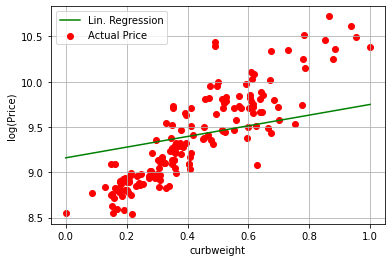

In [29]:
feat_ind = 2;
y1 = plt.scatter(useful_minmax_train_X.iloc[:,max_coeffs8_mag_ind[feat_ind]], np.log(minmax_train_Y), color = "red", label="Actual Price")
# Line plot using individual coefficient
y2 = plt.plot(np.linspace(0,1,5), coeffs8[max_coeffs8_mag_ind[feat_ind]]*np.linspace(0,1,5) + model8.intercept_, color = "green", label="Lin. Regression")
plt.xlabel(useful_minmax_train_X.columns[max_coeffs8_mag_ind[feat_ind]]);
plt.ylabel('log(Price)');
plt.grid()
plt.legend();

### Scatterplot of Price vs. 4th-Largest-Weighted Feature

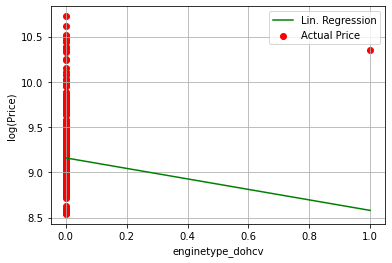

In [30]:
feat_ind = 3;
y1 = plt.scatter(useful_minmax_train_X.iloc[:,max_coeffs8_mag_ind[feat_ind]], np.log(minmax_train_Y), color = "red", label="Actual Price")
# Line plot using individual coefficient
y2 = plt.plot(np.linspace(0,1,5), coeffs8[max_coeffs8_mag_ind[feat_ind]]*np.linspace(0,1,5) + model8.intercept_, color = "green", label="Lin. Regression")
plt.xlabel(useful_minmax_train_X.columns[max_coeffs8_mag_ind[feat_ind]]);
plt.ylabel('log(Price)');
plt.grid()
plt.legend();

### Scatterplot of Price vs. 5th-Largest-Weighted Feature

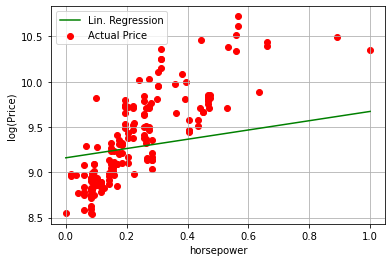

In [31]:
feat_ind = 4;
y1 = plt.scatter(useful_minmax_train_X.iloc[:,max_coeffs8_mag_ind[feat_ind]], np.log(minmax_train_Y), color = "red", label="Actual Price")
# Line plot using individual coefficient
y2 = plt.plot(np.linspace(0,1,5), coeffs8[max_coeffs8_mag_ind[feat_ind]]*np.linspace(0,1,5) + model8.intercept_, color = "green", label="Lin. Regression")
plt.xlabel(useful_minmax_train_X.columns[max_coeffs8_mag_ind[feat_ind]]);
plt.ylabel('log(Price)');
plt.grid()
plt.legend();

### Scatterplot of Price vs. 6th-Largest-Weighted Feature

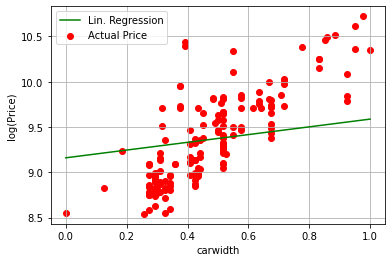

In [32]:
feat_ind = 5;
y1 = plt.scatter(useful_minmax_train_X.iloc[:,max_coeffs8_mag_ind[feat_ind]], np.log(minmax_train_Y), color = "red", label="Actual Price")
# Line plot using individual coefficient
y2 = plt.plot(np.linspace(0,1,5), coeffs8[max_coeffs8_mag_ind[feat_ind]]*np.linspace(0,1,5) + model8.intercept_, color = "green", label="Lin. Regression")
plt.xlabel(useful_minmax_train_X.columns[max_coeffs8_mag_ind[feat_ind]]);
plt.ylabel('log(Price)');
plt.grid()
plt.legend();

### Scatterplot of Predicted Price vs. Actual Price - Training Data